In [1]:
import cv2
import datetime as dt
import h5py
import matplotlib.pylab as plb
import os
from glob import glob

In [2]:
def make_h5_file():

    PATH = os.path.abspath(os.path.join('dog'))
    SOURCE_IMAGES = os.path.join(PATH)
    images = glob(os.path.join(SOURCE_IMAGES, "*.jpg"))


    height = 256
    width = 256
    dim = 3
    shape = (height, width, dim)
    
    with h5py.File('data.h5', 'w') as hf: 
        for i,img in enumerate(images):            
            # Images
            image = cv2.imread(img)
            image = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)
            Xset = hf.create_dataset(
                name='X'+str(i),
                data=image,
                shape=(height, width, dim),
                maxshape=(height, width, dim),
                compression="gzip",
                compression_opts=9)

In [3]:
make_h5_file()

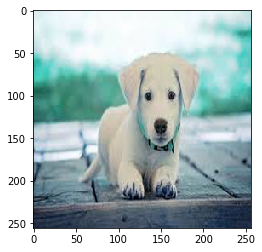

In [4]:
with h5py.File('data.h5', 'r') as hf:
    plb.imshow(hf["X0"])